# Demonstration of shifty.py's "known" module
 - 202002XX
 - Payne 
 
There is a "Known" class
 - This handles both data-downloads and operations associated with recovering the signal for a known object

This notebook:
 - ... 

#### Import statements 

In [2]:
# -------------------------------------------------------------------------------------
# Third party imports
# -------------------------------------------------------------------------------------
import numpy as np 
import matplotlib.pyplot as plt
import os, sys
import glob 
import importlib

import astropy
from astropy.io import fits
from astropy.time import Time
from astropy.units import allclose as quantity_allclose
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.coordinates.builtin_frames import FK5, ICRS, GCRS, GeocentricMeanEcliptic, BarycentricMeanEcliptic, HeliocentricMeanEcliptic, GeocentricTrueEcliptic, BarycentricTrueEcliptic, HeliocentricTrueEcliptic, HeliocentricEclipticIAU76
from astropy.constants import R_sun, R_earth

# -------------------------------------------------------------------------------------
# Local imports
# -------------------------------------------------------------------------------------
sys.path.append(os.path.join(os.path.split(os.getcwd())[0], 'shifty'))
import known

importlib.reload(known)


<module 'known' from '/Users/matthewjohnpayne/Envs/shifty/shifty/known.py'>

### Instantiate Known object

In [3]:
# creation of Known object
K = known.Known()

# there are probably no instantiated variables ...
assert len(K.__dict__) == 0


##### Use Known to look at positions of sedna
 - While developing, we'll want to know the position of sedna as a function of time
 - I've downloaded the positions (from JPL Horizons) during Sector-5 as a convenience 

In [4]:
importlib.reload(known)
K = known.Known()

# These are the values from JPL at hourly intervals
JD_, RA_, Dec_  = K._radec_for_sedna()
for t,r,d in zip(JD_[:2], RA_[:2], Dec_[:2]):
    print(t,r,d)
print()

# These are interpolated values at arbitrary times 
times = [2458436.5, 2458436.51, 2458436.52, 2458436.53, 2458436.54]
RA_, Dec_ = K._interpolate_radec_for_sedna(times)
for t,r,d in zip(times, RA_, Dec_):
    print(t,r,d)
print() 


2458436.5 57.1364 7.65498
2458436.541666667 57.13601 7.65487

2458436.5 57.1364 7.65498
2458436.51 57.13630640000279 7.654953600000787
2458436.52 57.13621280000122 7.654927200000344
2458436.53 57.13611920000401 7.654900800001131
2458436.54 57.13602560000244 7.654874400000688



In [5]:
# Some notes on which camera/ccd/etc we expect Sedna to be in 
# - These came from inputing 57.136 7.6549 into lightkurve's tess-cut/tess-search function 
camera = 1 
ccd = 4
col, row = 1550, 1101

(2458445, 2458455)

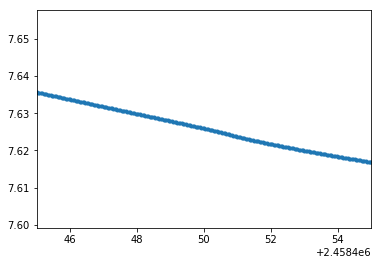

In [12]:
RA_, Dec_ = K._interpolate_radec_for_sedna(JD_)
#plt.plot(JD_, RA_ , '.')
plt.plot(JD_, Dec_ , '.')
plt.xlim([2458445, 2458455])